In [1]:
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import pickle

## Q1. Downloading the data

We'll use [the same NYC taxi dataset](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page),
but instead of "**Green** Taxi Trip Records", we'll use "**Yellow** Taxi Trip Records".

Download the data for January and February 2022.

In [9]:
%%capture
!wget -nc https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-01.parquet -P data
!wget -nc https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-02.parquet -P data

Read the data for January. How many columns are there?

In [2]:
df_jan = pd.read_parquet('data/yellow_tripdata_2022-01.parquet')
df_feb = pd.read_parquet('data/yellow_tripdata_2022-02.parquet')
len(df_jan.columns)

19

## Q2. Computing duration

Now let's compute the `duration` variable. It should contain the duration of a ride in minutes. 

What's the standard deviation of the trips duration in January?

In [3]:
df_jan['duration'] = df_jan.tpep_dropoff_datetime - df_jan.tpep_pickup_datetime
df_jan.duration = df_jan.duration.apply(lambda td: td.total_seconds() / 60)

df_feb['duration'] = df_feb.tpep_dropoff_datetime - df_feb.tpep_pickup_datetime
df_feb.duration = df_feb.duration.apply(lambda td: td.total_seconds() / 60)

In [4]:
df_jan.duration.describe()['std'].round(2)

46.45

## Q3. Dropping outliers

Next, we need to check the distribution of the `duration` variable. There are some outliers. Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).

What fraction of the records left after you dropped the outliers?

* 90%
* 92%
* 95%
* 98%

In [5]:
len_before = len(df_jan)
df_jan = df_jan[(df_jan.duration >=1) & (df_jan.duration <= 60)]
len_after = len(df_jan)

df_feb = df_feb[(df_feb.duration >=1) & (df_feb.duration <= 60)]


In [6]:
round(len_after/len_before*100)

98

## Q4. One-hot encoding

Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model. 

* Turn the dataframe into a list of dictionaries
* Fit a dictionary vectorizer 
* Get a feature matrix from it

What's the dimensionality of this matrix (number of columns)?

* 2
* 155
* 345
* 515
* 715

In [7]:
dv = DictVectorizer()

loc_id_features = ['PULocationID', 'DOLocationID']

df_jan[loc_id_features] = df_jan[loc_id_features].astype('str')
df_feb[loc_id_features] = df_feb[loc_id_features].astype('str')


jan_dicts = df_jan[loc_id_features].to_dict(orient='records')
X_train = dv.fit_transform(jan_dicts)

feb_dicts = df_feb[loc_id_features].to_dict(orient='records')
X_val = dv.transform(feb_dicts)

In [8]:
X_train.shape, X_val.shape

((2421440, 515), (2918187, 515))

In [9]:
target = 'duration'
y_train = df_jan[target].values
y_val = df_feb[target].values

In [10]:
def plot_prediction_vs_actual_distribution(y_true, y_pred):
    sns.histplot(
        y_pred , kde=True,
        stat="density", kde_kws=dict(cut=3), bins=50,
        label='prediction'
    )
    sns.histplot(
        y_true , kde=True,
        stat="density", kde_kws=dict(cut=3), bins=50,
        label='actual'
    )
    plt.legend()

In [11]:
def predict_and_plot(lr):
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_val)
    print('RMSE = ', round(mean_squared_error(y_true=y_val, y_pred=y_pred, squared=False), 2))
    plot_prediction_vs_actual_distribution(y_true=y_val, y_pred=y_pred)
    return lr

## Q6. Evaluating the model

Now let's apply this model to the validation dataset (February 2022). 

What's the RMSE on validation?

* 7.79
* 12.79
* 17.79
* 22.79


RMSE =  7.79


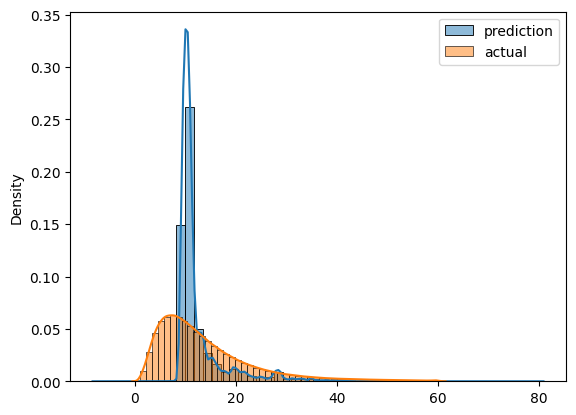

In [12]:
trained_linear_regression = predict_and_plot(LinearRegression())

## Q5. Training a model

Now let's use the feature matrix from the previous step to train a model. 

* Train a plain linear regression model with default parameters 
* Calculate the RMSE of the model on the training data

What's the RMSE on train?

* 6.99
* 11.99
* 16.99
* 21.99

In [13]:
print('RMSE = ', round(mean_squared_error(y_true=y_train, y_pred=trained_linear_regression.predict(X_train), squared=False), 2))

RMSE =  6.99
